In [6]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 100

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, offline
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import requests

from os import listdir
import unicodedata

from paths import *
from scripts.manipulation import remove_acentos
from scripts.manipulation import normalize_cols
from scripts import scrap_data
from scripts import manipulation
from scripts import io
from scripts import vis_graphs

from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')

import yaml


# LOAD and SAVE DATA from WORDMETERS

In [2]:
new_data, df_final = scrap_data.load_data()

In [3]:
df_wordmeters = io.load_total_table()
df_wordmeters = manipulation.create_all_country_total_data(df_wordmeters, vars = ['confirmed','deaths','recovered','active'])


## European Centre for Disease Prevention and Contro

https://data.europa.eu/euodp/en/data/dataset/covid-19-coronazvirus-data

In [180]:
df_eucenter = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')
dd = manipulation.manipulate_eucenter(df_eucenter)

### Generate Graphs for Multiple Countrys

In [4]:
df = df_wordmeters.copy()

codes = ['BR','IT','ES','US','CN','KR','DE','FR','UK']
mask_countrys = df['countrycode'].isin(codes)

In [32]:
from scripts import vis_layout
themes = yaml.load(open('../themes/custom_colorscales.yaml', 'r'), Loader=yaml.FullLoader)

themes = themes['all_countrys']
for var in themes['vars'].keys():
    for tipo in themes['axis_legend']['y'].keys():
        fig = vis_graphs.all_countrys(df[mask_countrys], var, tipo, themes, save=False)
        
        plot(fig, filename=f"../images/multipleCountry/{var}_{tipo}.html", auto_open=False)
        plot(fig, filename=f"../../sample_pages/pages/coronavirus/images/world/multipleCountry/{var}_{tipo}.html", auto_open=False)


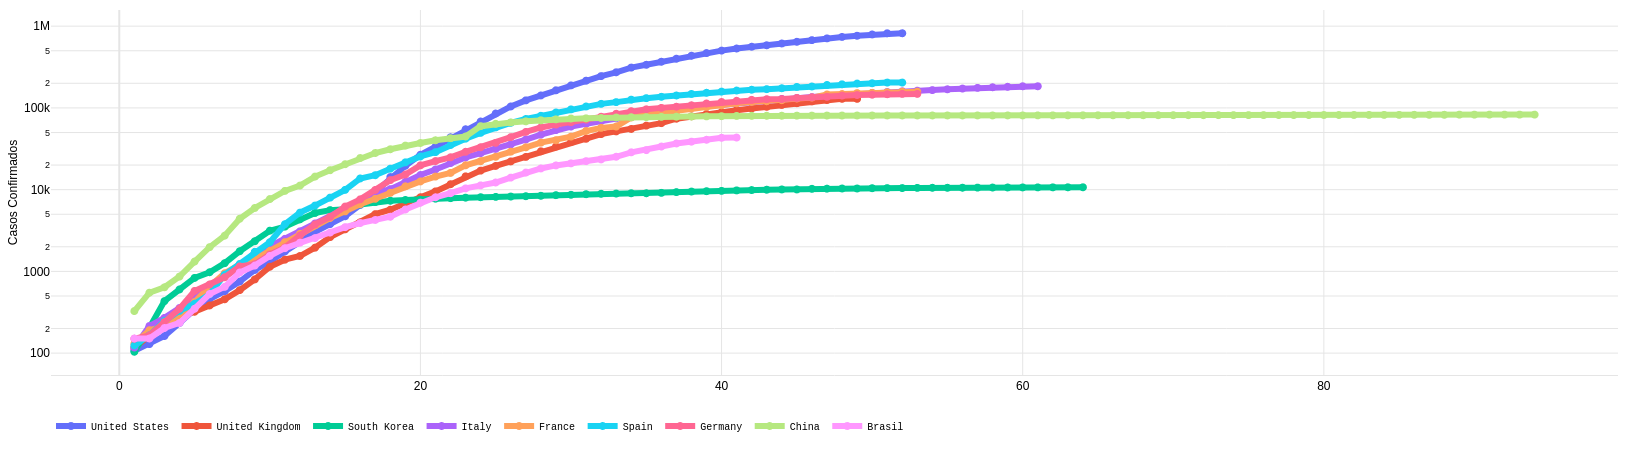

In [33]:
fig

## By Country

In [28]:
from scripts import vis_layout

In [29]:
def unique_country(dd,themes):
    
    data=[]
    
    for var in themes['vars'].keys():
        trace = go.Bar(
            name=themes['vars'][var]['nome'],
            x=dd['date'], 
            y=dd[var],
            marker=dict(color=themes['vars'][var]['color'],),
            hoverlabel=dict(namelength=-1, font=dict(size=themes['data']['hoverlabel_size']))   
            )
        data.append(trace)
    layout = vis_layout.get_layout_bar(themes)
    
    fig = go.Figure(data=data, layout=layout)
    
    return fig

In [30]:
df = df_wordmeters.copy()

themes = yaml.load(open('../themes/custom_colorscales.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['unique_country']

codes = ['BR','IT','ES','US','CN','KR','DE','FR','UK']

for countrycode in codes:
    mask = ((df['countrycode']==countrycode) & (df['confirmed']>0))
    fig = unique_country(df[mask],themes)
    plot(fig, filename=f"../images/singleCountry/{countrycode}.html", auto_open=False)
    plot(fig, filename=f"../../sample_pages/pages/coronavirus/images/world/singleCountry/{countrycode}.html", auto_open=False)


In [328]:


dd = df[mask]

In [ ]:
codes = ['BR','IT','ES','US','CN','KR','DE','FR','UK']

for countrycode in codes:
    

In [11]:
df = manipulation.create_single_country_data(df)

In [12]:
from scripts.vis_graphs import total_by_country
themes = yaml.load(open('../themes/custom_colorscales.yaml', 'r'), Loader=yaml.FullLoader)

fig = total_by_country(df,geoid='BR', escala='lin',var='cases', save=False, data=today,themes=themes['by_country'])

In [13]:
themes = yaml.load(open('../themes/custom_colorscales.yaml', 'r'), Loader=yaml.FullLoader)

for geo in ['IT','CN','US','UK','DE','ES','FR','BR']:
    for scale in ['lin','log']:
        for var in ['deaths','cases']:
                fig = total_by_country(df,geoid=geo, escala=scale,var=var, save=True,themes=themes['by_country'])

### Figures to UP

In [18]:
# from scripts import io

# f1_name = 'total_lin.html'
# f2_name = 'mortes_lin.html'
# f3_name = 'brasil_lin_total.html'
# f4_name = 'brasil_lin_mortes.html'
# # f5_name = "brasil_por_estado_confirmed.html"
# # f6_name = "brasil_por_estado_deaths.html"

# f1_path = f"../images/multipleCountry/{f1_name}"
# f2_path = f"../images/multipleCountry/{f2_name}"
# f3_path = f"../images/singleCountry/{f3_name}"
# f4_path = f"../images/singleCountry/{f4_name}"
# # f5_path = f"../images/brasil/{f5_name}"
# # f6_path = f"../images/brasil/{f6_name}"

# names_paths = {f1_name:f1_path,
#          f2_name:f2_path,
#          f3_name:f3_path,
#          f4_name:f4_path
#               }
# #          f5_name:f5_path,
# #          f6_name:f6_path}

# for name in names_paths.keys():
    
#     io.to_storage(bucket='sv-covid19',
#               bucket_folder='brasil',
#               file_name=name,
#               path_to_file=names_paths[name])